In [15]:
# Import all the module required.

import os
import re
import string
import numpy as np
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
gloveFile = "glove.42B.300d.txt"
dim=300

In [21]:

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# Remove non-Ascii chars
def rem_ascii(s):
    return "".join(s)
 
# Cleaning the text sentences so that punctuation marks, stop words and digits are removed.
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    processed = re.sub(r"\d+","",punc_free)
    return processed

# Creating and loading word to glove embedding dictionary.
def loadGloveModel(gloveFile):
    word_embeddings = {}
    f = open(gloveFile, encoding='utf-8')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        word_embeddings[word] = coefs
    f.close()
    return word_embeddings
 
word_embeddings = loadGloveModel(gloveFile)
print("Vocab Size = ",len(word_embeddings))

Vocab Size =  1917494


In [78]:
#text = "Energy efficiency and robustness of locomotion to different terrain conditions are important problems for humanoid robots deployed in the real world. In this paper, we propose a footstep-planning algorithm for humanoids that is applicable to flat, slanted, and slippery terrain, which uses simple principles and representations gathered from human gait literature. The planner optimizes a center-of-mass (COM) mechanical work model subject to motion feasibility and ground friction constraints using a hybrid A* search and optimization approach. Footstep placements and orientations are discrete states searched with an A* algorithm, while other relevant parameters are computed through continuous optimization on state transitions. These parameters are also inspired by human gait literature and include footstep timing (double-support and swing time) and parameterized COM motion using knee flexion angle keypoints. The planner relies on work, the required coefficient of friction (RCOF), and feasibility models that we estimate in a physics simulation. We show through simulation experiments that the proposed planner leads to both low electrical energy consumption and human-like motion on a variety of scenarios. Using the planner, the robot automatically opts between avoiding or (slowly) traversing slippery patches depending on their size and friction, and it chooses energy-optimal stairs and climbing angles in slopes. The obtained motion is also consistent with observations found in human gait literature, such as human-like changes in RCOF, step length and double-support time on slippery terrain, and human-like curved walking on steep slopes. Finally, we compare COM work minimization with other choices of the objective function. HUMANOID robot locomotion planning is an important problem with applications in disaster response and service. Footstep-planning algorithms are a computationally attractive solution to the locomotion problem, since they reduce the search space from whole-body motion to footstep positions and orientations. Current footstep planners excel at obstacle avoidance but do not consider important factors such as ground friction and energy consumption. These factors are especially important in outdoor environments where the robot will depend on batteries and surface conditions might be challenging: slippery, inclined, etc. While it still is not clear how footstep planners should be formulated in order to consider many such factors, our claim in this paper is that using principles and representations in human gait literature can lead to naturally improved footstep planning. Namely, in this paper we integrate human-inspired center-of-mass (COM) work and required coefficient of friction (RCOF) models as functions of footstep displacement, timing, and parameterized COM motion into a new hybrid search-optimization planner, obtaining friction-aware low-electrical-power footstep plans. In humanoid walking, as in human gait literature, it is common to distinguish two levels of locomotion control: planning and feedback control. In this paper, we focus on the (footstep) planning problem for humanoids. This problem is closely related to the study of anticipatory human gait adaptations. For example, representations of walking used in human gait literature to describe anticipatory gait control are closely related to those used in high-levelmotion-planning algorithms in robotics, such as footstep planning, contact planning, and other task-space planning approaches. Both typically deal with observations in terms of a high-level representation of walking such as modality, foot position, orientation, timing, limb stiffness, or COM height. For humanoids, the footstep- and contact-planning problems have been tackled with search [3]–[7], sampling [8], and optimization [9], [10] algorithms. Search-based planners such as A* [3]–[5] and its variants [6], [7] have been used successfully to plan obstacle-free paths in both static and dynamic [5] scenarios. Recently, purely optimization-based planners have also been proposed [10], which eliminate the suboptimal discretization problem inherent to search-based planners. Sampling-based planners [8], allowing for multiple contacts (e.g., hands, knees), are useful for very complex environments, although at a high computational cost, which can be slightly ameliorated with a good selection and adaptation of motion primitives [11]. While the aforementioned planners focus on finding collision-free paths, the methods in this paper go one step further by considering energy, collision, and friction. One important step in footstep planners is to estimate whether or not a given stance or step is feasible. Some authors opt to approximate feasibility by rough reachability of the feet [7], full inverse kinematics feasibility [8], or smart collision checking [12]. In this paper, we use both rough reachability intervals to discard obvious unfeasible poses, as in [7], but also learn a model of feasibility from physics simulation, in which feasibility is both static and dynamic. Research closely related to this paper includes [3], in which terrain and energy-related cost functions are used in A* search to compute optimal cost plans. They sum a set of empirical human biomechanics-inspired models of energy cost that are polynomial functions of step length, width, and rotation. In addition, Kim, Pollard, and Atkeson [4] use a similar approach, with quadratic cost functions on sequences of footstep positions. On the other hand, in this paper we also consider timing variables and surface friction.We do not assume polynomial relationships and instead use an off-the-shelf machine-learning algorithm to learn the relationship between variables from data. And, finally, we make claims concerning energy consumption and humanlike motion. In this paper, we prevent slippage of the robot by planning, which complements other feedback control approaches to friction-constrained biped walking [13]–[15]. While feedback control can help to reduce tangential-to-normal force ratios locally, it may not be sufficient in very-low-friction surfaces. For example, a robot with rubber soles would be subjected to less than 0.15 kinetic friction when walking on ice. Slipping can be reduced in such low-friction floors without changing gait, but it is not eliminated [13]. Feedback control approaches usually consist of friction cone constraints in inverse dynamics [16] or operational space control framework [15]. Design parameters in the preview controller [17] can also be slightly tuned to reduce the RCOF for a fixed gait, and feedback ZMP controllers can be manually adapted to account for friction [13]. Efforts have also been put into reactive reflex controllers that, without changing gait parameters, try to reduce slipping after it is detected (e.g., by waist or foot acceleration reflexes [14]). In this paper, we take the complementary high-level approach by optimizing energy and eliminating slippage as much as possible by changes in gait. Such an approach solves the known problem of reactive controllers to not be able to avoid slipping on fast gait [14] and, at the same time, leverages human gait literature findings supporting energy and stability optimization at the footstep level, which is not just reactively but also anticipatorily controlled."
#text = "KPIS Seminar. Mohaimin Ehsan. Aida Usmanova."
text = "Microsoft held talks in the past few weeks to acquire software developer platform GitHub, Business Insider reports. One person familiar with the discussions between the companies told CNBC that they had been considering a joint marketing partnership valued around $35 million, and that those discussions had progressed to a possible investment or outright acquisition. It is unclear whether talks are still ongoing, but this person said that GitHub's price for a full acquisition was more than Microsoft currently wanted to pay. GitHub was last valued at $2 billion in its last funding round 2015, but the price tag for an acquisition could be $5 billion or more, based on a price that was floated last year. GitHub's tools have become essential to software developers, who use it to store code, keep track of updates and discuss issues. The privately held company has more than 23 million individual users in more than 1.5 million organizations. It was on track to book more than $200 million in subscription revenue, including more than $110 million from companies using its enterprise product, GitHub told CNBC last fall.Microsoft has reportedly flirted with buying GitHub in the past, including in 2016, although GitHub denied those reports. A partnership would give Microsoft another connection point to the developers it needs to court to build applications on its various platforms, including the Azure cloud. Microsoft could also use data from GitHub to improve its artificial intelligence producs. The talks come amid GitHub's struggle to replace CEO and founder Chris Wanstrath, who stepped down 10 months ago. Business Insider reported that Microsoft exec Nat Friedman -- who previously ran Xamarin, a developer tools start-up that Microsoft acquired in 2016 -- may take that CEO role. Google's senior VP of ads and commerce, Sridhar Ramaswamy, has also been in discussions for the job, says the report. Microsoft declined to comment on the report. GitHub did not immediately return a request for comment"
print(text)

sentences = sent_tokenize(text)

#cleaned_texts = []
#for i in sentences:
#    sentance = clean(i)
#    sentance = rem_ascii(sentance)
#    cleaned_texts += [sentance]
    
cleaned_texts = [rem_ascii(clean(sentence)) for sentence in sentences]

Microsoft held talks in the past few weeks to acquire software developer platform GitHub, Business Insider reports. One person familiar with the discussions between the companies told CNBC that they had been considering a joint marketing partnership valued around $35 million, and that those discussions had progressed to a possible investment or outright acquisition. It is unclear whether talks are still ongoing, but this person said that GitHub's price for a full acquisition was more than Microsoft currently wanted to pay. GitHub was last valued at $2 billion in its last funding round 2015, but the price tag for an acquisition could be $5 billion or more, based on a price that was floated last year. GitHub's tools have become essential to software developers, who use it to store code, keep track of updates and discuss issues. The privately held company has more than 23 million individual users in more than 1.5 million organizations. It was on track to book more than $200 million in sub

In [79]:
sentence_vectors = []
for i in cleaned_texts:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((dim,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((dim,))
    sentence_vectors.append(v)

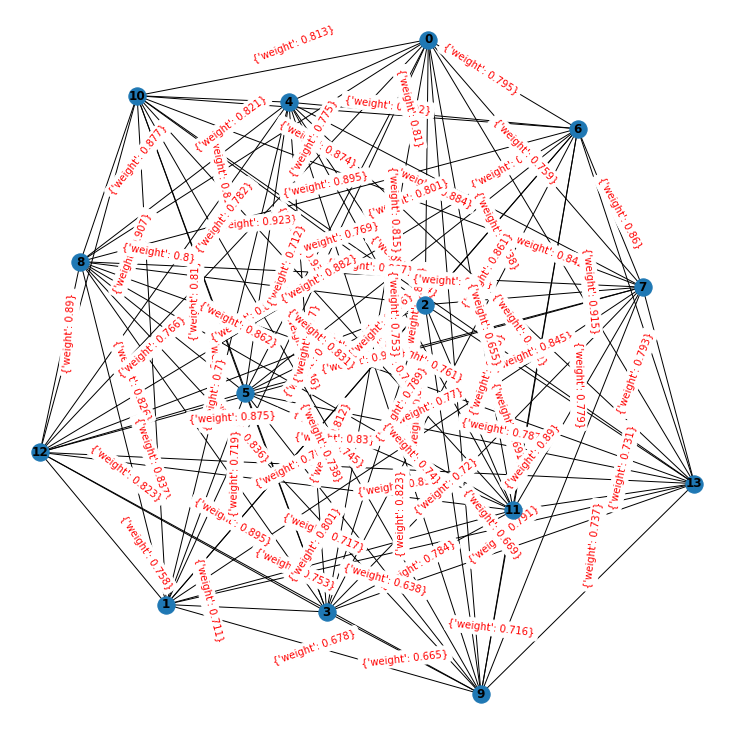

In [80]:
# Create a similarity matrix which keeps cosine distance of each sentences to every other sentence.

sim_mat = np.zeros([len(cleaned_texts), len(cleaned_texts)])
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,dim),sentence_vectors[j].reshape(1,dim))[0,0]
sim_mat = np.round(sim_mat,3)
#print(sim_mat)
 
# Creating the network graph
nx_graph = nx.from_numpy_array(sim_mat)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
plt.show()

In [81]:
#Using Goolge PageRank Algorithm for text ranking 
scores = nx.pagerank(nx_graph)
print(scores)

{0: 0.07454261527484465, 1: 0.07419547245599686, 2: 0.07499462568956257, 3: 0.07213571191790673, 4: 0.0722693333491538, 5: 0.06948154655812812, 6: 0.07526027713958862, 7: 0.07413511060146781, 8: 0.07099597487393274, 9: 0.06778345053158918, 10: 0.07306978438847853, 11: 0.06871715065370004, 12: 0.06842613146398238, 13: 0.06399281510166802}


In [88]:
ranked_sentences = sorted(((scores[i],i) for i,s in enumerate(sentences)), reverse=True)
arranged_sentences = sorted(ranked_sentences[0:int(len(sentences)*0.1)], key=lambda x:x[1])
print("\n".join([sentences[x[1]] for x in arranged_sentences]))

It was on track to book more than $200 million in subscription revenue, including more than $110 million from companies using its enterprise product, GitHub told CNBC last fall.Microsoft has reportedly flirted with buying GitHub in the past, including in 2016, although GitHub denied those reports.
